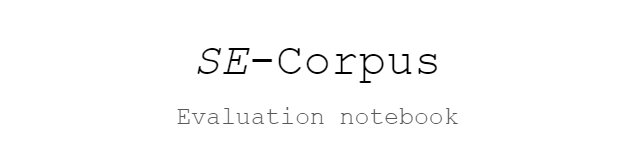

This notebook is used to evaluate the models trained with the *SE*-corpus. It includes relevant imports and cleaning code. Then, on the basis of the gold standard test annotations and the predicted tags, the evaluation tagset is created. After that, the evaluation metrics are calculated and confussion matrixes are drawn.

# Relevant imports

In [ ]:
import csv
import pandas as pd
import numpy as np
import os #explorar para qué sirve
import re

# Cleaning

### Test

In [ ]:
test = pd.read_csv("testgs_SF_bueno_bueno.csv", sep="\t", names=["ID", "FORM", "LEMMA", "UPOS", "XPOS", "FEATS", "HEAD", "DEPREL", "DEP", "MISC", "las"])

In [ ]:
# Dropping lines starting with '#'.

ind_drop = test[test['ID'].apply(lambda x: x.startswith('# '))].index
new_test = test.drop(ind_drop)

In [ ]:
# Dropping multiword statement lines.

ind_drop2 = new_test.loc[new_test['ID'].str.match('[0-9]+-')].index
new_test2 = new_test.drop(ind_drop2)

In [ ]:
len(new_test2)

In [ ]:
new_test2.to_csv("test_clean.csv", sep="\t", index=False, float_format="%i")

In [ ]:
new_test2.head()

### Preds

In [ ]:
preds = pd.read_csv("preds_210610.csv", sep="\t", names=["ID", "FORM", "LEMMA", "UPOS", "XPOS", "FEATS", "HEAD", "DEPREL", "DEP", "MISC", "las"])

In [ ]:
# Dropping lines starting with '#'.

ind_drop = preds[preds['ID'].apply(lambda x: x.startswith('# '))].index
new_preds = preds.drop(ind_drop)

In [ ]:
# Dropping multiword statement lines.

ind_drop2 = new_preds.loc[new_preds['ID'].str.match('[0-9]+-')].index
new_preds2 = new_preds.drop(ind_drop2)

In [ ]:
ind_drop2

In [ ]:
len(new_preds2)

In [ ]:
new_preds2.to_csv("preds_clean.csv", sep="\t", index=False, float_format="%i")

In [ ]:
new_preds2.head()

# Create evaluation dataset

## Global


### Test las

In [ ]:
test = pd.read_csv("test_clean.csv", sep="\t")
test.head()

In [ ]:
test["las"] = test["HEAD"].apply(str) + test["DEPREL"]
test.head()

In [ ]:
#df2["las"].to_csv("test_las.csv", sep="\t")

### Preds las

In [ ]:
preds = pd.read_csv("preds_clean.csv", sep="\t")
preds.head()

In [ ]:
preds["las"] = preds["HEAD"].apply(str) + preds["DEPREL"]
preds.head()

In [ ]:
# df3["las"].to_csv("preds_las.csv", sep="\t")

### Eval

In [ ]:
eval_las = pd.DataFrame(columns = ["gs", "gsd", "result", "confusion"])
eval_las["gs"] = test["las"]
eval_las["gsd"] = preds["las"]
eval_las.head()

In [ ]:
eval_las.to_csv("eval_las.csv", index=False, sep = "\t")

In [ ]:
eval_uas = pd.DataFrame(columns = ["gs", "gsd", "result", "confusion"])
eval_uas["gs"] = test["HEAD"]
eval_uas["gsd"] = preds["HEAD"]
eval_uas.head()

In [ ]:
eval_uas.to_csv("eval_uas.csv", index=False, sep = "\t")

-----------------------

Manual review of the documents generated to check that cells match.

--------------



## SE

### Test

In [ ]:
test.head() 

In [ ]:
test_se = test.loc[test['FORM'].str.match(r'se$')] #quitar el loc a ver qué pasa
len(test_se)

In [ ]:
test_se["las"].to_csv("test_se_las.csv", index=False, sep = "\t")
test_se["HEAD"].to_csv("test_se_uas.csv", index=False, sep = "\t")

### Preds

In [ ]:
preds.head()

In [ ]:
preds_se = preds.loc[preds['FORM'].str.match(r'se$')]
len(preds_se)

In [ ]:
preds_se["las"].to_csv("preds_se_las.csv", index=False, sep = "\t")
preds_se["HEAD"].to_csv("preds_se_uas.csv", index=False, sep = "\t")

### Eval se

In [ ]:
test_se_las = pd.read_csv("test_se_las.csv", sep = "\t")
print(len(test_se_las))
test_se_uas = pd.read_csv("test_se_uas.csv", sep = "\t")
len(test_se_uas)

In [ ]:
preds_se_las = pd.read_csv("preds_se_las.csv", sep = "\t")
print(len(preds_se_las))
preds_se_uas = pd.read_csv("preds_se_uas.csv", sep = "\t")
len(preds_se_uas)

In [ ]:
eval_se_las = pd.DataFrame(columns = ["gs", "gsd", "result", "confusion"])
eval_se_las["gs"] = test_se_las["las"]
eval_se_las["gsd"] = preds_se_las["las"]
eval_se_las

In [ ]:
eval_se_las.to_csv("eval_se_las.csv", index=False, sep = "\t")

In [ ]:
eval_se_uas = pd.DataFrame(columns = ["gs", "gsd", "result", "confusion"])
eval_se_uas["gs"] = test_se_uas["HEAD"]
eval_se_uas["gsd"] = preds_se_uas["HEAD"]
eval_se_uas

In [ ]:
eval_se_uas.to_csv("eval_se_uas.csv", index=False, sep = "\t")

------------

Revisión manual

--------------

# NON-BINARY CATEGORIES

In [ ]:
import csv

with open("eval_se_uas.csv") as filein, open("eval_se_uas_result.csv","w") as fileout: 
    reader = csv.DictReader(filein, delimiter = '\t')
    writer = csv.DictWriter(fileout, fieldnames = ['gs', 'gsd', 'result', 'confusion']) # hay que hacer una lista con todos los headers.
    writer.writeheader() # con esto escribes explícitamente la cabecera nueva
    
    for row in reader:
        if row['gs'] == '':
            if row['gsd'] == row['gs']:
                row['result'] = '00'    
            else: 
                row['result'] = '01'
        
        elif row['gs'] != '':
            if row['gsd'] == row['gs']:
                row['result'] = '11'
            else:
                row['result'] = '10'      
        writer.writerow(row)

In [ ]:
import csv

with open("eval_se_uas_result.csv") as filein, open("eval_se_uas_result_confusion.csv","w") as fileout: 
    reader = csv.DictReader(filein, delimiter = ',')
    writer = csv.DictWriter(fileout, fieldnames = ['gs', 'gsd', 'result', 'confusion']) # hay que hacer una lista con todos los headers.
    writer.writeheader() # con esto escribes explícitamente la cabecera nueva
    
    for row in reader:
        if row['result'] == '00':
            row['confusion'] = 'true negative'
        if row['result'] == '01':
            row['confusion'] = 'false negative'
        if row['result'] == '10':
            row['confusion'] = 'false positive'
        if row['result'] == '11':
            row['confusion'] = 'true positive'   
        writer.writerow(row)

In [ ]:
 #import pandas as pd
 import os

In [ ]:
# Read files in <docs/> directory and store their names in a list if they end with <_confusion.csv> except the <verguenza_confusion.csv> file.
files = [file for file in os.listdir('./') if (('_confusion.csv' in file))] # and '(file!='prueba.csv'))]' solamente es necesario si el nombre del fichero tmb incluye '_confusion.csv'

In [ ]:
files

In [ ]:
# Create a dictionary with 5 fileds:
#  1- <files>: contains a list of files.
#  2,3,4,5- Confusion Matrix Fields (true positive, false ...): contain empty lists, which will be filled with their corresponding values for each file.
confusion_dict = {'true positive': [], 'false positive': [], 'true negative': [], 'false negative': []}

# Loop through each file and through each Confusion Matrix Field to fill the values in the dictionary.
for f in files:
    df = pd.read_csv("./" + f)
    for metric in confusion_dict.keys():
        confusion_dict[metric].append(sum(df['confusion']==metric))
        
confusion_dict['files'] = files

In [ ]:
confusion_dict

In [ ]:
# Create a DataFrame Using the Dictionary with the Files and Confusion Matrix Values.
# DataFrame = pd.DataFrame({'Column1': List_Of_Values_In_Column1, ..., 'ColumnN': List_Of_Values_In_ColumnN}) 
# (The length of the lists in the dictionary need to have all the same length.)
confusion_df = pd.DataFrame(confusion_dict)

In [ ]:
confusion_df.columns

In [ ]:
confusion_df = confusion_df[['files', 'false negative', 'false positive', 'true negative','true positive']].copy()

In [ ]:
# Show the 5 first rows of the Data Frame.
confusion_df.head()

In [ ]:
# Calculate the Precision, Recall, F1-Score, Negative Predictive Value, and Specificity for all the rows in the DataFrame.
confusion_df['Precision'] = confusion_df['true positive']/(confusion_df['true positive'] + confusion_df['false positive'])
confusion_df['Recall']    = confusion_df['true positive']/(confusion_df['true positive'] + confusion_df['false negative'])
confusion_df['F1-Score']  = 2 * (confusion_df['Precision']*confusion_df['Recall'])/(confusion_df['Precision'] + confusion_df['Recall'])
confusion_df['Negative Predictive Value'] = confusion_df['true negative']/(confusion_df['true negative'] + confusion_df['false negative'])
confusion_df['Specificity'] = confusion_df['true negative']/(confusion_df['true negative'] + confusion_df['false positive'])

In [ ]:
# Show the 5 first rows of the Data Frame.
confusion_df.head()

In [ ]:
# Save the DataFrame as a csv file, (exclude the index which in this case is redundant).
confusion_df.to_csv('eval_210610_metrics.csv', index=False)

--------------

# *SE* CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  
import seaborn as sn
import pandas as pd

In [ ]:
eval_se_tags = pd.read_csv("eval_se_tags.csv", delimiter = "\t")
eval_se_tags

In [ ]:
y_true = eval_se_tags["gs"]
y_pred = eval_se_tags["gsd"]

In [ ]:
labels = ["expl", "obj", "iobj", "se-mark"]
cm = confusion_matrix(y_true, y_pred, labels)
cm

In [ ]:
! pip install -q scikit-plot

In [ ]:
import scikitplot as skplt

bestmodel_plot_no_normal_sinsf = skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(12,12),
    cmap="Blues",
    text_fontsize="large",
    title=" ")

In [ ]:
bestmodel_plot_no_normal.figure.savefig('bestmodel_plot_no_normal.png')

In [ ]:
ancora_plot_normal = skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(14,14),
    cmap="Greens",
    title=" ",
    normalize=True)

In [ ]:
ancora_plot_normal.figure.savefig('gsd_plot_normal.png')